**Vamos experimentar agora a Rede Neural Artificial?**
Veja:
https://scikit-learn.org/stable/modules/neural_networks_supervised.html# 

In [100]:
%pip -q install yellowbrick
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [101]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
import pickle

In [102]:
df = pd.read_csv('../Dados/breast-cancer.csv', sep=',',  header=0)
df = pd.get_dummies(df)

In [103]:
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [104]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [105]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=0)

In [106]:
# Definindo o pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('oversampler', RandomOverSampler()),
    ('classifier', SVC())
])

In [107]:
# Definindo os parâmetros para o Grid Search
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf', 'poly'],
    'classifier__gamma': ['scale', 'auto']
}

In [108]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the pipeline with the oversampler step as the intermediate step
pipeline = make_pipeline(RandomOverSampler(), SVC())
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_treino, y_treino)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('randomoversampler',
                                        RandomOverSampler()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear', 'rbf', 'poly']})

In [109]:
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

Melhores parâmetros encontrados:
{'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}


In [110]:
# Salvando o modelo treinado
with open('../Dados/breast-cancer.pickle', 'wb') as f:
    pickle.dump((grid_search, X_teste, y_teste), f)

**Vamos treinar com a rede neural?**

**Experimente a RNA com os parâmetros default. A rede convergiu? quantas épocas?**

In [111]:
import pandas as pd
import pickle

# Carregando a base de dados
df = pd.read_csv('../Dados/breast-cancer.csv', sep=',',  header=0)
df = pd.get_dummies(df)

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Carregando o modelo treinado
with open('../Dados/breast-cancer.pickle', 'rb') as f:
    grid_search, X_teste, y_teste = pickle.load(f)

# Fazendo previsões com o modelo treinado
y_pred = grid_search.predict(X_teste)

# Avaliando o desempenho do modelo
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_teste, y_pred))
print(classification_report(y_teste, y_pred))

[[36  0]
 [ 0 22]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        36
        True       1.00      1.00      1.00        22

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



**Depois execute novamente com os ajustes. Veja agora os erros a cada época.. estabeleça o verbose para true **

In [112]:
modelo = MLPClassifier(max_iter=1000, verbose=True)
modelo.fit(X_treino, y_treino)

Iteration 1, loss = 0.90303300
Iteration 2, loss = 0.84064344
Iteration 3, loss = 0.78799195
Iteration 4, loss = 0.74369770
Iteration 5, loss = 0.70653953
Iteration 6, loss = 0.67762667
Iteration 7, loss = 0.65382836
Iteration 8, loss = 0.63545741
Iteration 9, loss = 0.62071854
Iteration 10, loss = 0.60861737
Iteration 11, loss = 0.59912790
Iteration 12, loss = 0.59092970
Iteration 13, loss = 0.58313544
Iteration 14, loss = 0.57533073
Iteration 15, loss = 0.56805688
Iteration 16, loss = 0.56054889
Iteration 17, loss = 0.55205278
Iteration 18, loss = 0.54394185
Iteration 19, loss = 0.53450071
Iteration 20, loss = 0.52534227
Iteration 21, loss = 0.51595737
Iteration 22, loss = 0.50736979
Iteration 23, loss = 0.49779170
Iteration 24, loss = 0.48964307
Iteration 25, loss = 0.48147997
Iteration 26, loss = 0.47328703
Iteration 27, loss = 0.46523714
Iteration 28, loss = 0.45772738
Iteration 29, loss = 0.44968697
Iteration 30, loss = 0.44193091
Iteration 31, loss = 0.43433458
Iteration 32, los

Iteration 41, loss = 0.35907482
Iteration 42, loss = 0.35315867
Iteration 43, loss = 0.34742748
Iteration 44, loss = 0.34097708
Iteration 45, loss = 0.33410450
Iteration 46, loss = 0.32678147
Iteration 47, loss = 0.32014191
Iteration 48, loss = 0.31290314
Iteration 49, loss = 0.30673091
Iteration 50, loss = 0.30095148
Iteration 51, loss = 0.29520749
Iteration 52, loss = 0.28984782
Iteration 53, loss = 0.28482131
Iteration 54, loss = 0.27940155
Iteration 55, loss = 0.27377330
Iteration 56, loss = 0.26793771
Iteration 57, loss = 0.26211266
Iteration 58, loss = 0.25695765
Iteration 59, loss = 0.25195260
Iteration 60, loss = 0.24794810
Iteration 61, loss = 0.24379890
Iteration 62, loss = 0.23936204
Iteration 63, loss = 0.23465348
Iteration 64, loss = 0.22954955
Iteration 65, loss = 0.22467966
Iteration 66, loss = 0.21961839
Iteration 67, loss = 0.21497998
Iteration 68, loss = 0.21073579
Iteration 69, loss = 0.20643802
Iteration 70, loss = 0.20216792
Iteration 71, loss = 0.19797058
Iteratio

MLPClassifier(max_iter=1000, verbose=True)

**Faça outras alterações nos parâmetros**

**4 entradas - 3 neurônios - 3 neurônios - 1**

**Veja SoftMax para problemas multiclasse**

In [113]:
rede_neural = MLPClassifier(max_iter=1000, verbose=True, tol=0.00000000000001, solver = 'adam', activation = 'relu', hidden_layer_sizes = 9)
modelo.fit(X_treino, y_treino)

Iteration 1, loss = 0.80973237
Iteration 2, loss = 0.76133222
Iteration 3, loss = 0.72114859
Iteration 4, loss = 0.68769304
Iteration 5, loss = 0.65972109
Iteration 6, loss = 0.63869239


Iteration 7, loss = 0.61963017
Iteration 8, loss = 0.60471962
Iteration 9, loss = 0.59210896
Iteration 10, loss = 0.58195562
Iteration 11, loss = 0.57207116
Iteration 12, loss = 0.56326978
Iteration 13, loss = 0.55525526
Iteration 14, loss = 0.54748214
Iteration 15, loss = 0.53969801
Iteration 16, loss = 0.53192640
Iteration 17, loss = 0.52428791
Iteration 18, loss = 0.51656166
Iteration 19, loss = 0.50908717
Iteration 20, loss = 0.50158037
Iteration 21, loss = 0.49410906
Iteration 22, loss = 0.48647714
Iteration 23, loss = 0.47906392
Iteration 24, loss = 0.47185003
Iteration 25, loss = 0.46439220
Iteration 26, loss = 0.45776645
Iteration 27, loss = 0.45039039
Iteration 28, loss = 0.44372263
Iteration 29, loss = 0.43700373
Iteration 30, loss = 0.43051438
Iteration 31, loss = 0.42476230
Iteration 32, loss = 0.41894002
Iteration 33, loss = 0.41297614
Iteration 34, loss = 0.40717298
Iteration 35, loss = 0.40140421
Iteration 36, loss = 0.39531728
Iteration 37, loss = 0.38885222
Iteration 3

MLPClassifier(max_iter=1000, verbose=True)



> **Vamos testar o modelo?**



In [114]:
previsoes = modelo.predict(X_teste)

In [115]:
previsoes

array([False,  True, False,  True, False,  True, False,  True, False,
       False,  True, False, False, False,  True, False, False,  True,
       False, False, False, False,  True, False,  True, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True,  True, False, False,  True, False,
       False, False,  True,  True,  True,  True, False,  True, False,
       False,  True, False, False])



> **Será se o modelo acertou?**



In [116]:
y_teste

array([False,  True,  True,  True, False,  True, False,  True, False,
       False,  True, False, False, False,  True, False, False,  True,
       False, False, False, False,  True, False,  True, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True,  True, False, False,  True, False,
       False, False,  True,  True,  True,  True, False,  True, False,
       False,  True, False,  True])

In [117]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.9655172413793104

In [118]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[36,  0],
       [ 2, 20]])

0.9655172413793104

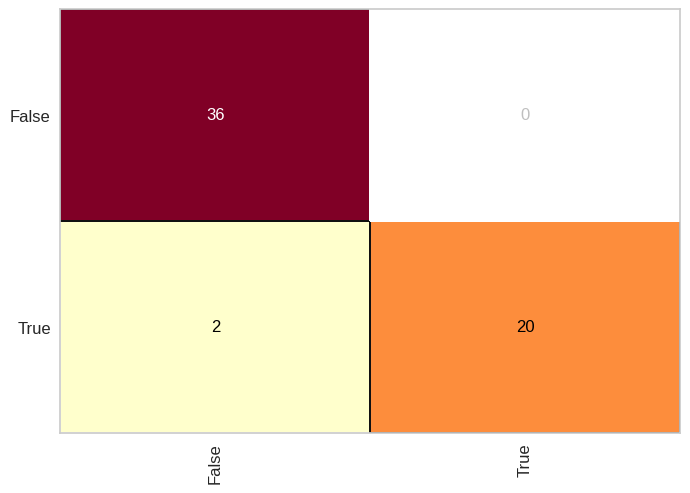

In [119]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [120]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

       False       0.95      1.00      0.97        36
        True       1.00      0.91      0.95        22

    accuracy                           0.97        58
   macro avg       0.97      0.95      0.96        58
weighted avg       0.97      0.97      0.97        58



**Veja como implementar o backpropagation em python:**
https://www.askpython.com/python/examples/backpropagation-in-python
https://www.deeplearningbook.com.br/algoritmo-backpropagation-em-python/
